In [2]:
import ast
import seaborn as sns
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [3]:
df_DA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA = df_DA.dropna(subset = ['salary_year_avg'])

In [4]:
df_DA_skill = df_DA.explode('job_skills')

In [21]:
high_paid_skills = df_DA_skill.groupby('job_skills')['salary_year_avg'].median().sort_values(ascending=False).head(10)

In [22]:
high_paid_skills = high_paid_skills.reset_index(name='salary_year_avg')

In [39]:
in_demand_skills = df_DA_skill.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

In [43]:
in_demand_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


/var/folders/9s/gf5r5sm16hg7qm1m86byhk9w0000gn/T/ipykernel_10750/3289461352.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=high_paid_skills, y='job_skills', x='salary_year_avg', palette='viridis', ax=ax[0])
/var/folders/9s/gf5r5sm16hg7qm1m86byhk9w0000gn/T/ipykernel_10750/3289461352.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=in_demand_skills, y='job_skills', x='median', palette='viridis', ax=ax[1])


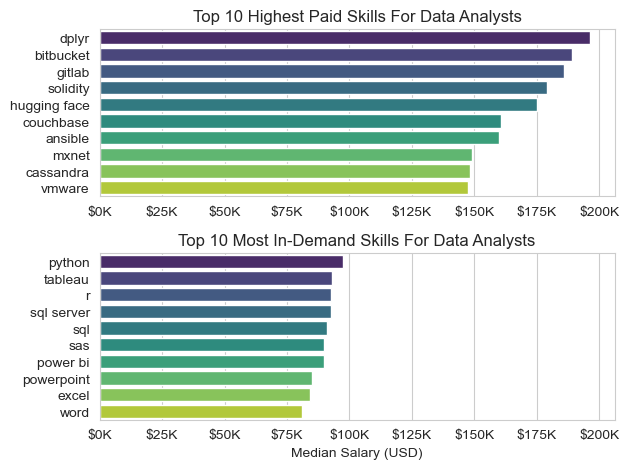

In [56]:
fig, ax = plt.subplots(2, 1, sharex=True)
sns.barplot(data=high_paid_skills, y='job_skills', x='salary_year_avg', palette='viridis', ax=ax[0])
sns.set_style('whitegrid')

sns.barplot(data=in_demand_skills, y='job_skills', x='median', palette='viridis', ax=ax[1])

ax[0].set_ylabel('')
ax[0].set_title('Top 10 Highest Paid Skills For Data Analysts')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].tick_params(axis='x', which='both', labelbottom=True)


ax[1].set_ylabel('')
ax[1].set_title('Top 10 Most In-Demand Skills For Data Analysts')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()